In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.loadtxt("/content/drive/MyDrive/Code/x.txt")
cov = np.loadtxt("/content/drive/MyDrive/Code/COV.txt")

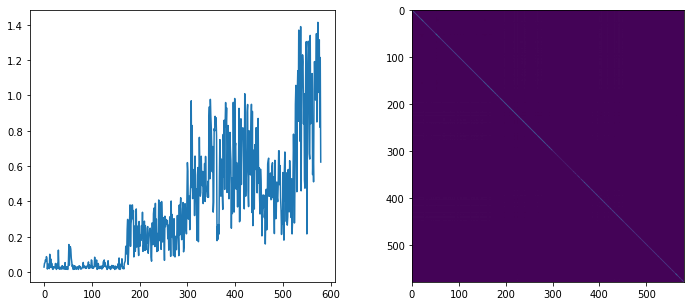

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(x)
ax[1].imshow(cov)

In [7]:
z = np.loadtxt("/content/drive/MyDrive/Code/x.txt")

omega_m_best = 0.3
omega_lambda_best = 0.7
omega_best = -1
h0_best = 70

In [8]:
def Omega_K(omega_m, omega_lambda):
    return 1-omega_m-omega_lambda

def Integral(z_i, omega_m, omega_lambda, omega):
    omega_K = Omega_K(omega_m, omega_lambda)
    def arr(z_i):
        return 1/(omega_m*(1+z_i)**3 + omega_lambda*(1+z_i)**(3*(omega+1)) - omega_K*(1+z_i)**2)**.5
    z_range=np.linspace(0,z_i,2)
    dz=z_range[1]-z_range[0]
    return np.trapz([arr(zi) for zi in z_range])*dz 

def DL(z_i, omega_m, omega_lambda, omega):
    omega_K = Omega_K(omega_m, omega_lambda)
    integral = Integral(z_i, omega_m, omega_lambda, omega)
    a = (1+z_i)/np.sqrt(abs(omega_K))
    b = np.sqrt(abs(omega_K)) * integral
    if omega_K == 0:
        return (1+z_i)*integral
    elif omega_K > 0:
        sinn = np.sinh(b)
    else:
        sinn = np.sin(b)
    return a*sinn

def mu_th(z, h0, omega_m, omega_lambda, omega):
    mu_list=[]
    for z_i in z:
        dL=DL(z_i, omega_m, omega_lambda, omega)
        mu_list.append(5*(np.log10(dL)+np.log10(3*10**5/h0)+5))
    return mu_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


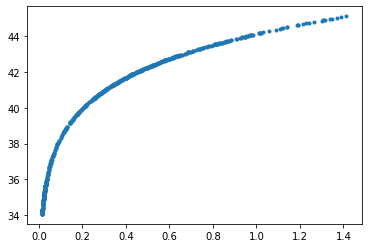

In [9]:
mu_th = mu_th(z, h0_best, omega_m_best, omega_lambda_best, omega_best)
plt.plot(z, mu_th, '.')

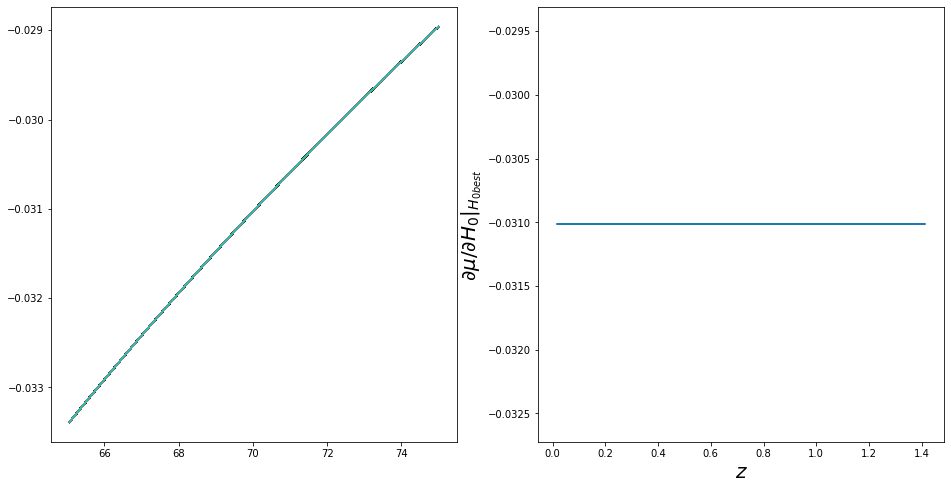

In [10]:
def Mu_th_H0(H0):
    return 5*np.log10(3*10**5/H0)

h0_arr = np.linspace(65,75,500)
dH0 = h0_arr[1] - h0_arr[0]
where_best = np.argmin(abs(h0_arr-(h0_best)))
dmu_dH0_best = []

fig,ax=plt.subplots(1,2, figsize=(16,8))
for _ in range(len(z)):
    dmu_dH0 = []
    for i in range(1, len(h0_arr)-1):
        dmu_dH0.append((Mu_th_H0(h0_arr[i+1])-Mu_th_H0(h0_arr[i-1]))/(2*dH0))
    dmu_dH0 = np.array(dmu_dH0)
    dmu_dH0_best.append(dmu_dH0[where_best])

    ax[0].plot(h0_arr[3:], dmu_dH0[1:])
dmu_dH0_best=np.array(dmu_dH0_best)

ax[1].plot(z, dmu_dH0_best)
ax[1].set_xlabel(r'$z$', fontsize=20)
ax[1].set_ylabel(r'$\partial\mu/\partial H_0|_{H_{0 best}}$', fontsize=20);
